In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [4]:
img_width = 180
img_height =180 

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [6]:
data_cat = data_train.class_names

In [7]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


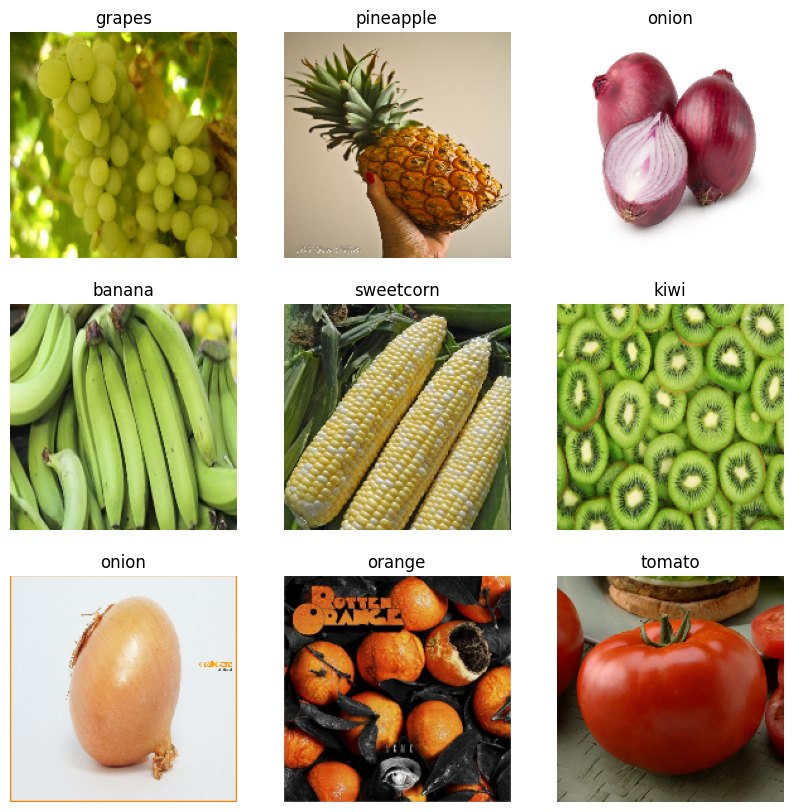

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 144ms/step - accuracy: 0.0953 - loss: 3.3720 - val_accuracy: 0.4046 - val_loss: 2.1538
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.3549 - loss: 2.2941 - val_accuracy: 0.6439 - val_loss: 1.3015
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.5358 - loss: 1.6544 - val_accuracy: 0.8348 - val_loss: 0.7215
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.7156 - loss: 0.9870 - val_accuracy: 0.8718 - val_loss: 0.5430
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.8392 - loss: 0.5572 - val_accuracy: 0.9402 - val_loss: 0.3617
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.9060 - loss: 0.3398 - val_accuracy: 0.9231 - val_loss: 0.4695
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.9275 - loss: 0.2582 - val_accuracy: 0.9544 - val_loss: 0.3654
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.9659 - loss: 0.1749 - val_accu

Text(0.5, 1.0, 'Loss')

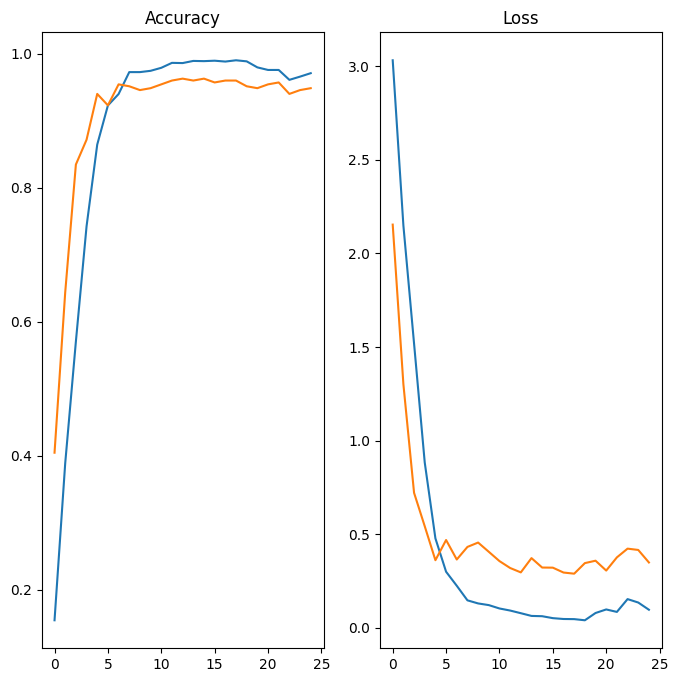

In [16]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [23]:
image = 'Cabbage.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [24]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [25]:
score = tf.nn.softmax(predict)

In [26]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is cabbage with accuracy of 92.09


In [27]:
model.save('Image_classify.keras')